# Aufwärmübung

**Inhalt: ** Shapely-Shapes

**Nötige Skills**
- Basic pandas skills

**Lernziele**
- Punkte, Linien, Polygone

## Setup

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline

## Shapely

Eine Library zur mathematischen Analyse von Formen und für die Geometrie: https://shapely.readthedocs.io/en/stable/

### Point

In [28]:
x1 = 5
y1 = 5

In [29]:
punkt1 = Point(x1, y1) #dazu brauch es die library point

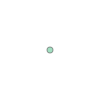

In [30]:
punkt1

### Line

In [31]:
x2a = 20
y2a = 0

x2b = 0
y2b = 20

In [32]:
linie1 = LineString([Point(x2a, y2a), Point(x2b, y2b)])

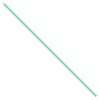

In [33]:
linie1

### Polygon

In [34]:
x3a = 0
y3a = 0

x3b = 10
y3b = 0

x3c = 10
y3c = 10

x3d = 0
y3d = 10

In [35]:
polygon1 = Polygon([[x3a, y3a], [x3b, y3b], [x3c, y3c], [x3a, y3d]]) #hier müssen Punkte nicht explizit definiert werden.

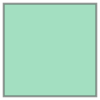

In [36]:
polygon1

### Let's plot it

In [37]:
df = pd.DataFrame({'geometry': [punkt1, linie1]}) 

In [38]:
df

,geometry
0,POINT (5 5)
1,"LINESTRING (20 0, 0 20)"


In [39]:
gdf = gpd.GeoDataFrame(df, geometry='geometry') #geodataframe hat eine zusätzliche "Geometriespalte", die das
#Bearbeiten mit geopandas erlaubt (das sieht man hier nicht direkt)

In [40]:
gdf

,geometry
0,POINT (5 5)
1,"LINESTRING (20 0, 0 20)"


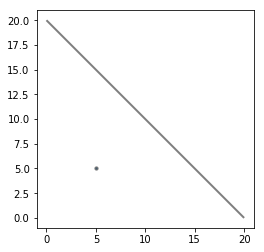

In [41]:
gdf.plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

In [42]:
#Ein Haus zeichnen
x3a = 0
y3a = 0

x3b = 20
y3b = 0

x3c = 20
y3c = 10

x3d = 10
y3d = 20

x3e = 0
y3e = 10

x3f = 20
y3f = 10

x3g = 40
y3g = 10

In [43]:
polygon2 = Polygon([[x3a, y3a], [x3b, y3b], [x3c, y3c], [x3d, y3d], [x3e, y3e], [x3f, y3f], [x3g, y3g]])

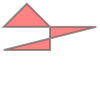

In [44]:
polygon2

## Your Turn

Wir spielen Picasso und zeichnen ein Haus.

**Aufgabe:** Definieren Sie ein paar Rechtecke, Linien und Punkte...

In [45]:
polygon1 = Polygon([[x3a, y3a], [x3b, y3b], [x3c, y3c], [x3a, y3d]])

In [46]:
linie2 = LineString([Point(0, 10), Point(5, 13), Point(10, 10)])

In [47]:
polygon2 = Polygon([[5, 0], [5, 3], [7, 3], [7, 0]])

In [48]:
punkt2 = Point(5.5, 1)

... fügen Sie die Objekte in ein Geodataframe und plotten Sie dieses!

In [49]:
df = pd.DataFrame({'geometry': [polygon1, linie2, polygon2, punkt2]})

In [50]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [51]:
gdf

,geometry
0,"POLYGON ((0 0, 20 0, 20 10, 0 20, 0 0))"
1,"LINESTRING (0 10, 5 13, 10 10)"
2,"POLYGON ((5 0, 5 3, 7 3, 7 0, 5 0))"
3,POINT (5.5 1)


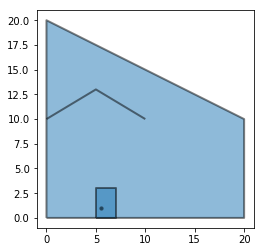

In [52]:
gdf.plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

## Eigenschaften

- Geometrie-Typ

In [53]:
polygon1.geom_type

'Polygon'

- Fläche

In [54]:
polygon1.area

300.0

- Mittelpunkt

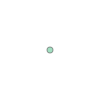

In [55]:
polygon1.centroid

- Rohdaten

In [57]:
polygon1.wkt # wkt == quasi textliche Präsentation

'POLYGON ((0 0, 20 0, 20 10, 0 20, 0 0))'

## Shapes modifizieren

### Buffer

Praktisch: Erstellt eine "Pufferzone" mit dem Radius x rund um ein Shape

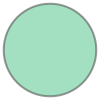

In [59]:
punkt1.buffer(3) #Kreis mit Abstnd 3 vom punkt1

Können wir auch plotten:

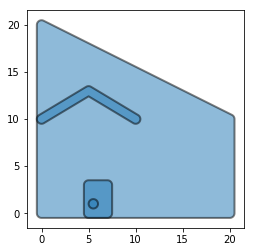

In [60]:
gdf.buffer(0.5).plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

### Union

Auch praktisch: Vereinigt zwei (oder mehr) Shapes zu einer einzigen Shape.

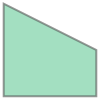

In [61]:
polygon1.union(linie2)

Um alle shapes in einem Geodataframe zusammenzufügen: `.unary_union`

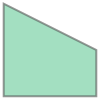

In [62]:
gdf.unary_union

Auch hier können wir wieder eine Pufferzone darumlegen...

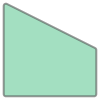

In [63]:
gdf.unary_union.buffer(0.5)

### Difference

Die "Differenz" zwischen zwei Shapes

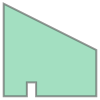

In [64]:
polygon1.difference(polygon2)

### Envelope

Ähnlich wie Buffer - ein Rechteck, das ein Objekt umhüllt

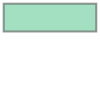

In [65]:
linie2.envelope

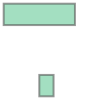

In [66]:
linie2.envelope.union(polygon2)